<a href="https://colab.research.google.com/github/MarkAvilin1/DS-and-ML/blob/main/CVAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Задание Ultra Pro**
Модель генерации с помощью Conditional Variational AutoEncoder (CVAE)

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Lambda, Flatten, Reshape 
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LambdaCallback
from IPython.display import clear_output, Image
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

x_train = x_train/255 
x_test  = x_test/255 


x_train = np.expand_dims(x_train, axis=-1) 
x_test = np.expand_dims(x_test, axis=-1) 

y_test_int, y_train_int = y_test.copy(), y_train.copy()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
batch_size = 100 
latent_dim = 20 
dropout_rate = 0.3 
start_lr = 0.0001 
img_height = x_train.shape[1]
img_width = x_train.shape[2] 
img_chanels = x_train.shape[3]
latent_distrs = [] 

In [ ]:
def apply_bn_and_dropout(x):
  x = Dropout(dropout_rate) (x) 
  x = BatchNormalization() (x) 
  return x


def sampling(args): 
  z_mean, z_log_var = args 
  epsilon = K.random_normal(shape=(latent_dim,), mean=0., stddev=1.0)
  sampling_layer = z_mean + K.exp(z_log_var / 2) * epsilon 
  return sampling_layer



def vae_loss(x, decoded):  
  kl_loss = -0.5 * K.sum(1.0 + z_log_var_model([x,num_elements]) - K.square(z_mean_model([x,num_elements])) - K.exp(z_log_var_model([x,num_elements])), axis=-1) # по формуле кульбака-лейблера устанавливаем ошибку

  x = K.reshape(x, (-1, img_height*img_width)) 
  decoded = K.reshape(decoded, (-1, img_height*img_width)) 
  xent_loss = img_height*img_width*binary_crossentropy(x, decoded) 

  res = (xent_loss + kl_loss)/2.0/img_height/img_width 
  return res

In [ ]:
epoch = 0
num_elements = K.constant(y_train[batch_size*epoch:batch_size*(epoch+1)])

In [ ]:
en_in = Input((img_height, img_width, img_chanels)) 
en = Flatten() (en_in) 
class_1 = Input(shape=(10))  
en = concatenate([en, class_1])
en = Dense(256, activation='relu') (en) 
en = Dense(128, activation='relu') (en) 
en = apply_bn_and_dropout(en) 

z_mean = Dense(latent_dim) (en) 
z_log_var = Dense(latent_dim) (en) 

l = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])  


dec_in = Input(shape =(latent_dim,)) 
class_2 = Input(shape=(10,))
dec = concatenate([dec_in, class_2])
dec = Dense(128) (dec) 
dec = LeakyReLU()(dec) 
dec = apply_bn_and_dropout(dec) 
dec = Dense(256) (dec)
dec = LeakyReLU()(dec) 
dec = apply_bn_and_dropout(dec) 
dec = Dense(img_height*img_width, activation='sigmoid') (dec) 
dec = Reshape((img_height, img_width, img_chanels)) (dec) 

encoder = Model([en_in, class_1], l)

decoder = Model([dec_in, class_2], dec) 

z_mean_model = Model([en_in, class_1], z_mean)  

z_log_var_model = Model([en_in, class_1], z_log_var)

CVAE = Model([en_in, class_1, class_2], decoder([encoder([en_in, class_1]), class_2])) 

In [ ]:
CVAE.compile(loss=vae_loss, optimizer=Adam(start_lr))

In [ ]:
CVAE.fit([x_train, y_train, y_train], x_train, batch_size=batch_size, epochs=100, verbose=1)

Epoch 1/100
600/600 [==============================] - 9s 9ms/step - loss: 0.3053
Epoch 2/100
600/600 [==============================] - 5s 8ms/step - loss: 0.1523
Epoch 3/100
600/600 [==============================] - 5s 9ms/step - loss: 0.1124
Epoch 4/100
600/600 [==============================] - 5s 9ms/step - loss: 0.1032
Epoch 5/100
600/600 [==============================] - 5s 8ms/step - loss: 0.0991
Epoch 6/100
600/600 [==============================] - 5s 8ms/step - loss: 0.0963
Epoch 7/100
600/600 [==============================] - 5s 9ms/step - loss: 0.0941
Epoch 8/100
600/600 [==============================] - 5s 9ms/step - loss: 0.0924
Epoch 9/100
600/600 [==============================] - 5s 8ms/step - loss: 0.0908
Epoch 10/100
600/600 [==============================] - 5s 9ms/step - loss: 0.0896
Epoch 11/100
600/600 [==============================] - 5s 9ms/step - loss: 0.0884
Epoch 12/100
600/600 [==============================] - 5s 8ms/step - loss: 0.0873
Epoch 13/100


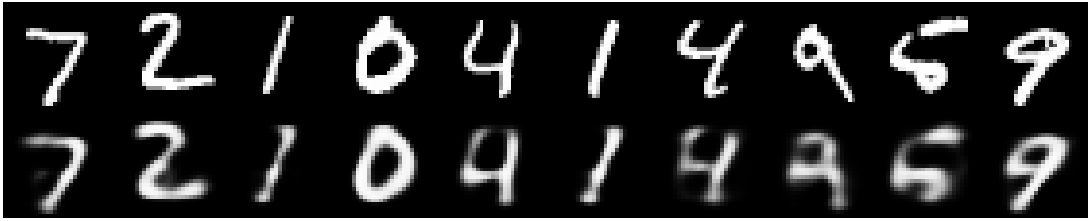

In [ ]:
real_img = x_test[:10] 
real_img_nums = y_test[:10] 
pred_img = CVAE.predict([real_img, real_img_nums, real_img_nums]) 

real_img_concat = np.concatenate([i for i in real_img[:,:,:,0]], axis=1) 
pred_img_concat = np.concatenate([i for i in pred_img[:,:,:,0]], axis=1) 
plot_img = np.concatenate((real_img_concat, pred_img_concat), axis=0) 
latent_distrs.append(plot_img) 

plt.figure(figsize=(2*img_height, 2*len(real_img)), dpi=25) 
plt.imshow(plot_img, cmap='Greys_r') 
plt.grid(False) 
plt.axis('off') 
plt.show() 